<a href="https://colab.research.google.com/github/tahamidcse/AI_LAB/blob/main/fcnn_mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
import cv2

# Path to your custom image

# --- Build model
inputs = Input((28, 28, 1), name='Input Layer')
h1 = Flatten()(inputs)
h2 = Dense(32, activation='relu', name='h2')(h1)
h3 = Dense(64, activation='relu', name='h3')(h2)
h4 = Dense(128, activation='relu', name='h4')(h3)
outputs = Dense(10, activation='softmax', name='output_layer')(h4)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train


# --- Load MNIST data
(trainX, trainY), (testX, testY) = load_data()

# Normalize and reshape
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
trainX = trainX.reshape(-1, 28, 28, 1)
testX = testX.reshape(-1, 28, 28, 1)
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)
model.fit(trainX, trainY, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on MNIST test set
test_loss, test_acc = model.evaluate(testX, testY)
print(f"FCNN test accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8228 - loss: 0.5928 - val_accuracy: 0.9500 - val_loss: 0.1708
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9521 - loss: 0.1557 - val_accuracy: 0.9559 - val_loss: 0.1592
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9649 - loss: 0.1146 - val_accuracy: 0.9629 - val_loss: 0.1276
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9718 - loss: 0.0937 - val_accuracy: 0.9668 - val_loss: 0.1217
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0797 - val_accuracy: 0.9643 - val_loss: 0.1319
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.1533
FCNN test accuracy: 0.9631, Test Loss: 0.1269


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class for custom image: 7


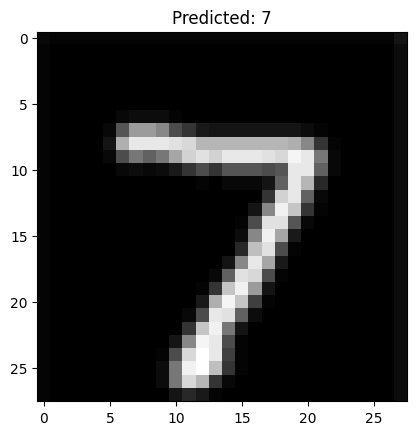

In [22]:

img_path = '/content/sample_data/sample_image(1).png'
# --- Load and preprocess your custom image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)   # Load grayscale
img = cv2.resize(img, (28, 28))                   # Ensure 28x28
img = img.astype("float32") / 255.0               # Normalize
img = np.expand_dims(img, axis=-1)                # Add channel dim
img = np.expand_dims(img, axis=0)                 # Add batch dim

# Predict
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

print(f"Predicted class for custom image: {predicted_class}")

# Show image
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()
